In [1]:
from UnionCom2 import unioncom
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import scanpy as sc
import pandas as pd
import random
import anndata
seed = 1
np.random.seed(seed)
random.seed(seed)

In [2]:
def align_fraction(data1, data2):
	row1, col1 = np.shape(data1)
	row2, col2 = np.shape(data2)
	fraction = 0
	for i in range(row1):
		count = 0
		diffMat = np.tile(data1[i], (row2,1)) - data2
		sqDiffMat = diffMat**2
		sqDistances = sqDiffMat.sum(axis=1)
		for j in range(row2):
			if sqDistances[j] < sqDistances[i]:
				count += 1
		fraction += count / row2
	return fraction / row1
from sklearn.neighbors import KNeighborsClassifier
def transfer_accuracy(domain1, domain2, type1, type2):
	knn = KNeighborsClassifier(n_neighbors=10)
	knn.fit(domain2, type2)
	type1_predict = knn.predict(domain1)
	count = 0
	for label1, label2 in zip(type1_predict, type1):
		if label1 == label2:
			count += 1
	return count / len(type1)

def plot_embedding(data1, data2, type1, type2):
	data_aligned = np.concatenate((data1_aligned,data2_aligned),axis=0)
	data_aligned_tsne = TSNE(n_components=2).fit_transform(data_aligned)
	data1_aligned_tsne = data_aligned_tsne[:data1_aligned.shape[0],:]
	data2_aligned_tsne = data_aligned_tsne[data1_aligned.shape[0]:,:]
	plt.figure(figsize=(10,4))
	plt.subplot(121)
	palette = np.array(['#e6194b', '#3cb44b', '#ffe119', '#4363d8',
						'#f58231', '#911eb4', '#46f0f0', '#f032e6',
						'#bcf60c', '#fabebe', '#008080', '#e6beff',
						'#9a6324', '#fffac8', '#800000', '#aaffc3',
						'#808000', '#ffd8b1', '#000075', '#808080',])
	plt.scatter(data1_aligned_tsne[:,0],data1_aligned_tsne[:,1], marker='x', cmap='coolwarm', c=type1, s=20)
	plt.title('data1')
	plt.subplot(122)
	plt.scatter(data2_aligned_tsne[:,0],data2_aligned_tsne[:,1], marker='o', cmap='coolwarm', c=type2, s=20)
	plt.title('data2')
	plt.show()

## Simulations

total_loss: -0.9992, similarity: 0.9992: 100%|██████████| 2000/2000 [00:03<00:00, 645.49it/s]


label transfer accruacy 0.9566666666666667
FOSCTTM 0.07346666666666662


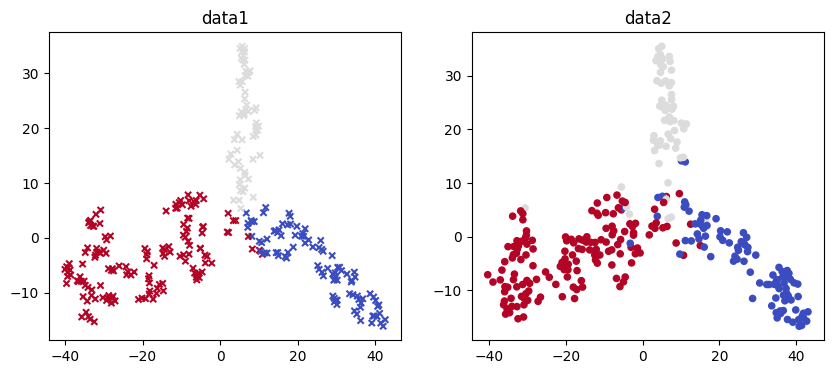

In [ ]:
##------------------SIMU------------------##
data1 = np.loadtxt("./MMD/s1_mapped1.txt")
data2 = np.loadtxt("./MMD/s1_mapped2.txt")
type1 = np.loadtxt("./MMD/s1_type1.txt")
type2 = np.loadtxt("./MMD/s1_type2.txt")
# data1 = np.loadtxt("./simu/domain1.txt")
# data2 = np.loadtxt("./simu/domain2.txt")
# type1 = np.loadtxt("./simu/type1.txt")
# type2 = np.loadtxt("./simu/type2.txt")

uc = unioncom(distance_mode='geodesic',manual_seed=1234, kmin=20)

F = uc.find_correspondece(
    data1, 
    data2, 
    epoch=2000, 
    integration_mode='v',
    device='cuda:0', 
)
data1_aligned, data2_aligned = uc.align(data2,F)
print('label transfer accruacy', transfer_accuracy(data1_aligned, data2_aligned, type1, type2))
print('FOSCTTM', align_fraction(data1_aligned, data2_aligned))
plot_embedding(data1_aligned, data2_aligned, type1, type2)

## DNA methylation & Gene expression

total_loss: -0.9957, similarity: 0.9957: 100%|██████████| 2000/2000 [00:02<00:00, 865.18it/s]


label transfer accruacy 0.5706214689265536


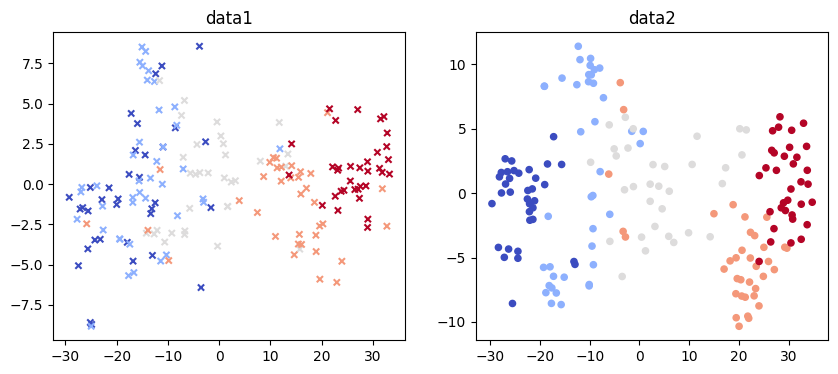

In [ ]:
data1 = np.loadtxt("./scGEM/DNAmethylation.txt")
data2 = np.loadtxt("./scGEM/GeneExpression.txt")
type1 = np.loadtxt("./scGEM/type1.txt")
type2 = np.loadtxt("./scGEM/type2.txt")

uc = unioncom(distance_mode='geodesic',manual_seed=1234, kmin=20)

F = uc.find_correspondece(
    data1, 
    data2, 
    epoch=2000, 
    integration_mode='v',
    device='cuda:0', 
)
data1_aligned, data2_aligned = uc.align(data2,F)
print('label transfer accruacy', transfer_accuracy(data1_aligned, data2_aligned, type1, type2))
plot_embedding(data1_aligned, data2_aligned, type1, type2)

## Hematopoietic Stem/Progenitor cells

total_loss: -1.6057, similarity: 1.6057: 100%|██████████| 2000/2000 [00:07<00:00, 273.03it/s]


label transfer accruacy 0.8293172690763052


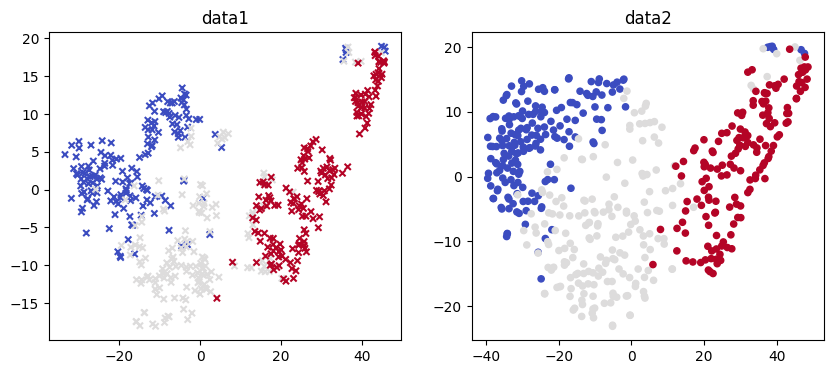

In [ ]:
##------------------Hematopoietic Stem/Progenitor cells------------------##
data1 = np.loadtxt("./hsc/domain1.txt")
data2 = np.loadtxt("./hsc/domain2.txt")
type1 = np.loadtxt("./hsc/type1.txt")
type2 = np.loadtxt("./hsc/type2.txt")

uc = unioncom(distance_mode='geodesic',manual_seed=1234, kmin=5)

F = uc.find_correspondece(
    data1, 
    data2, 
    epoch=2000, 
    integration_mode='h',
    use_topology=True,
    device='cuda:0', 
)
data1_aligned, data2_aligned = uc.align(data2,F)
print('label transfer accruacy', transfer_accuracy(data1_aligned, data2_aligned, type1, type2))
plot_embedding(data1_aligned, data2_aligned, type1, type2)

/tmp/ipykernel_3498701/681359949.py:82: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata_st.concatenate(adata_sc)
/home/kcao/miniconda3/envs/unioncom/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


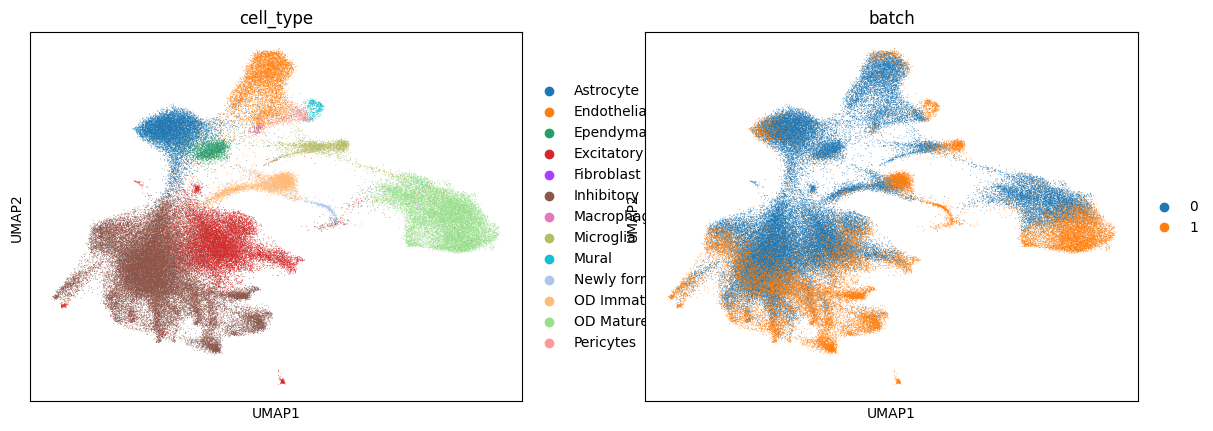

In [4]:
from UnionCom2 import unioncom
import numpy as np
import scanpy as sc
import pandas as pd
import random
import anndata

seed = 0
np.random.seed(seed)
random.seed(seed)
adata_st = sc.read_h5ad("./merfish/merfish0.h5ad")
adata_sc = sc.read_h5ad("./merfish/rna0.h5ad")
type_st = pd.read_csv('./merfish/MERFISH_mouse1_cluster.txt', sep='\t')
type_st = type_st['cluster_main'].values
type_sc = pd.read_csv('./merfish/scRNA_cluster.txt', sep='\t')
type_sc = type_sc['cluster_main'].values
common_genes = np.intersect1d(adata_st.var_names, adata_sc.var_names)
adata_st = adata_st[:, common_genes].copy()
adata_sc = adata_sc[:, common_genes].copy()
adata_st.obs['cell_type'] = type_st
adata_sc.obs['cell_type'] = type_sc

sc.pp.filter_cells(adata_st, min_genes=1)
sc.pp.filter_cells(adata_sc, min_genes=1)

sc.pp.normalize_total(adata_st)
sc.pp.log1p(adata_st)
sc.pp.normalize_total(adata_sc)
sc.pp.log1p(adata_sc)
adata_st.X = adata_st.X.toarray()
adata_sc.X = adata_sc.X.toarray()

data_st = adata_st.X
data_sc = adata_sc.X

print(data_st.shape, data_sc.shape)
print(adata_st.X.max(), adata_sc.X.max())

uc = unioncom(manual_seed=1234)

F_all_batch = []
n_batch = 3
rand_idx = np.random.permutation(data_st.shape[0])
for i in range(n_batch):
    idx = rand_idx[i*data_st.shape[0]//n_batch:(i+1)*data_st.shape[0]//n_batch]
    F = uc.find_correspondece(
        data_st[idx, :],
        data_sc, 
        epoch=1000, 
        integration_mode='h', 
        use_topology=False,
        device='cuda:0', 
        lambda_e=0.01
)
    F_all_batch.append(F)

F_all_batch = np.concatenate(F_all_batch, axis=0)
idx = np.argsort(rand_idx)
F_all_batch = F_all_batch[idx]

data1_aligned, data2_aligned = uc.align(data_sc,F_all_batch, device='cuda:0')
adata_sc.obsm['aligned'] = data2_aligned
adata_st.obsm['aligned'] = data1_aligned
adata = adata_st.concatenate(adata_sc)
sc.pp.neighbors(adata, use_rep='aligned', n_neighbors=30)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cell_type', 'batch'])